# K-means

In [126]:
# магическая функция для отображения графиков в блокноте
%matplotlib inline
import matplotlib.pyplot as plt # визуализация
import random 
import seaborn as sns; sns.set()  # стилизация графиков
import numpy as np # массивы
from sklearn.datasets.samples_generator import make_blobs # генерация изотропных гауссовых облаков 
from sklearn.cluster import KMeans 

## Собственная реализация
При создании модели надо выбрать между евклидовой и манхеттенской метрикой

In [127]:
'''
при инициализации классу нужно задать количество кластеров
fit(X, num_fit_x, max_iter, rseed) - функция обучения по объектам 
    X - набор входных объектов X, num_fit_x - длина батча, т.е. количество данных для обучения за одну итерацию,
    max_iter - максимальное кол-во итераций обучения, rseed - параметр для рандома.
predict(X) - предсказание значения меток для объектов Х
'''
class k_means:
    def __init__(self, n_clusters, dist = 0):
        self.n_clusters = n_clusters
        self.centers = np.zeros(n_clusters)
        self.dist = dist
        #dist = 0 - евклидово, 1 - манхеттенская метрика
    def fit(self, X , num_fit_x, max_iter = 100, rseed = 1):
        '''
        заведем массив меток self.labels, изначально все объекты принадлежат нулевому классу
        случайно расставим self.n_clusters центров, 
        поместим в self.centers (self.centers[i][0] первая координата, self.centers[i][1] - вторая)
        '''
        self.labels = np.zeros(len(X))
        rng = np.random.RandomState(rseed)
        i = rng.permutation(X.shape[0])[:self.n_clusters]
        self.centers = X[i]
        iterat = 0
        for i in range(1):
            iterat += 1
            # создаем рандомный массив num_fit_x разных номеров элементов из X - батч
            batch = random.sample(range(len(X)), num_fit_x)
            '''
            принимаем за меньшее расстояние расстояние до центра нулевого класса
            вычисляем расстояния до остальных центров 
            и если оно меньшее, запоминаем, что объект принадлежит классу этого центра
            '''
            for ind in batch:
                if self.dist == 0:
                    min = ((X[ind][0]-self.centers[0][0])**2 + (X[ind][1]-self.centers[0][1])**2)**(1/2)
                    for clus in range(1, self.n_clusters):
                        if ((X[ind][0]-self.centers[clus][0])**2 + (X[ind][1]-self.centers[clus][1])**2)**(1/2) < min:
                            min = ((X[ind][0]-self.centers[clus][0])**2 + (X[ind][1]-self.centers[clus][1])**2)**(1/2)
                            self.labels[ind] = int(clus)
                else:
                    min = abs(X[ind][0]-self.centers[0][0]) + abs(X[ind][1]-self.centers[0][1])
                    for clus in range(1, self.n_clusters):
                        if abs(X[ind][0]-self.centers[clus][0]) + abs(X[ind][1]-self.centers[clus][1]) < min:
                            min = abs(X[ind][0]-self.centers[clus][0]) + abs(X[ind][1]-self.centers[clus][1])
                            self.labels[ind] = int(clus)
                        
#             # пересчитываем центры согласно новому распределению объектов 
            new_centers = np.array([X[self.labels == i].mean(0) for i in range(self.n_clusters)])

#             # заканчиваем цикл в случае, если центры не сместились 
#             # или количество итераций достигло максимального 
            if np.all(self.centers == new_centers) or iterat == max_iter:
                break
            self.centers = new_centers
            self.labels =  self.predict(X)
        
    def predict(self, X):
        '''
        все объекты относим к нулевому классу
        для каждого объекта принимаем за меньшее расстояние 
        расстояние до центра нулевого класса.
        вычисляем расстояния до остальных центров 
        и если оно меньшее, запоминаем, что объект принадлежит классу этого центра
        '''
        ans = np.zeros(len(X))
        for ind in range(len(X)):
            if self.dist == 0:
                min = ((X[ind][0]-self.centers[0][0])**2 + (X[ind][1]-self.centers[0][1])**2)**(1/2)
                for clus in range(1, self.n_clusters):
                    if ((X[ind][0]-self.centers[clus][0])**2 + (X[ind][1]-self.centers[clus][1])**2)**(1/2) < min:
                        min = ((X[ind][0]-self.centers[clus][0])**2 + (X[ind][1]-self.centers[clus][1])**2)**(1/2)
                        ans[ind] = int(clus)
            else:
                min = abs(X[ind][0]-self.centers[0][0]) + abs(X[ind][1]-self.centers[0][1])
                for clus in range(1, self.n_clusters):
                    if abs(X[ind][0]-self.centers[clus][0]) + abs(X[ind][1]-self.centers[clus][1]) < min:
                        min = abs(X[ind][0]-self.centers[clus][0]) + abs(X[ind][1]-self.centers[clus][1])
                        ans[ind] = int(clus)
        plt.scatter(X[:, 0], X[:, 1], c=ans, s=50, cmap='viridis')
        return ans

### линейно разделимые множества (с расстоянием между группами в 10^3 раз больше, чем диаметр группы)

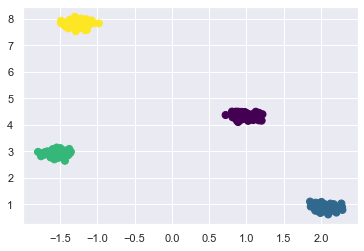

In [128]:
# сгенерируем 4 класса по 300 объектов
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.1, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.show()

### Пример кластеризации из библиотеки
- метод к средних
- евклидово расстояние
- указываем, что будет 4 кластера

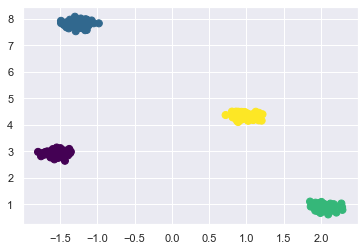

In [129]:
'''
заводим кластеризатор KMeans из sklearn'a, обучаем его и кластеризуем
отрисовывааем что получилось
'''
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.show()

### Пример собственной реализации кластеризации 
- метод к средних
- евклидово расстояние
- указываем, что будет 4 кластера

количество объектов 300, размер батча 20


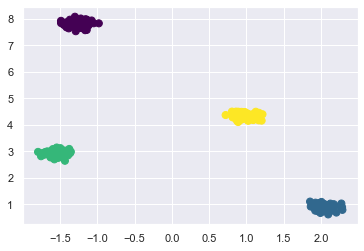

In [130]:
means = k_means(4, 0)
b =  20
print(f"количество объектов {len(X)}, размер батча {b}")
means.fit(X, b, 100, 1)

### Пример собственной реализации кластеризации 
- метод к средних
- манхеттенская метрика
- указываем, что будет 4 кластера

количество объектов 300, размер батча 25


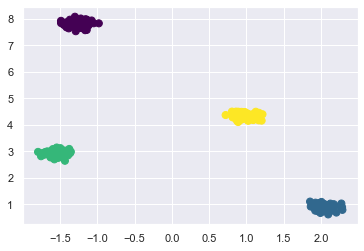

In [131]:
means = k_means(4, 1)
b =  25
print(f"количество объектов {len(X)}, размер батча {b}")
means.fit(X, b, 100, 1)

### линейно разделимые множества (группы расположены близко или касаются друг друга)


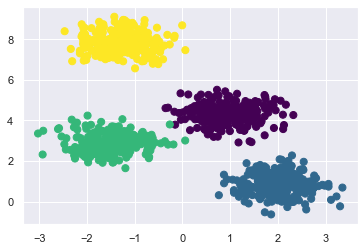

In [208]:
# сгенерируем 4 класса по 1000 объектов
X, y_true = make_blobs(n_samples=1000, centers=4,
                       cluster_std=0.5, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.show()

количество объетов 1000, размер батча 20


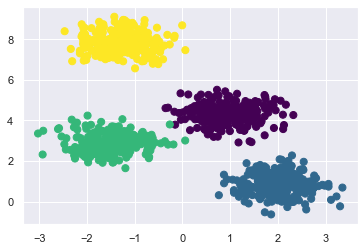

In [214]:
means = k_means(4, 0)
b = 20
print(f"количество объетов {len(X)}, размер батча {b}")
means.fit(X, b, 500, 1)

количество объетов 1000, размер батча 40


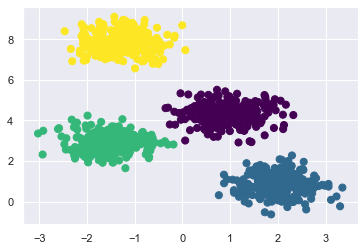

In [222]:
means = k_means(4, 1)
b = 40
print(f"количество объетов {len(X)}, размер батча {b}")
means.fit(X, b, 700, 1)

### линейно неразделимое множество (средняя площадь пересечения классов 10-20%)

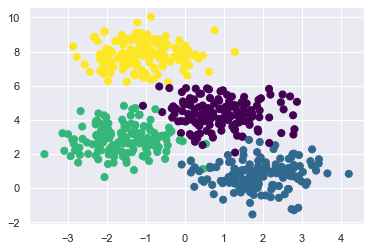

In [229]:
# сгенерируем 4 класса по 600 объектов
X, y_true = make_blobs(n_samples=600, centers=4,
                       cluster_std=0.8, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.show()

not sklearn
количество объетов 600, размер батча 30


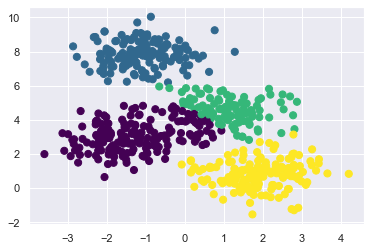

In [231]:
means = k_means(4, 0)
b =  30
print(f"количество объетов {len(X)}, размер батча {b}")
means.fit(X, b, 200, 1)

not sklearn
количество объетов 600, размер батча 30


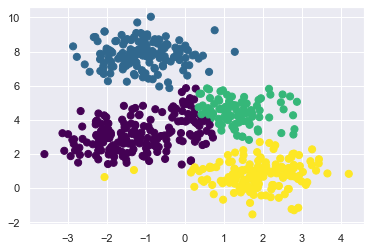

In [236]:
means = k_means(4, 1)
b =  30
print(f"количество объетов {len(X)}, размер батча {b}")
means.fit(X, b, 700, 1)

### линейно неразделимое множество (средняя площадь пересечения классов 50-70%)

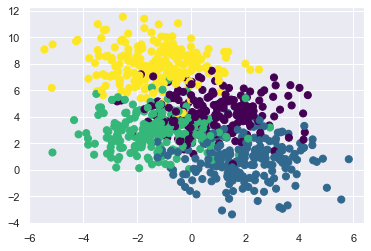

In [239]:
# сгенерируем 4 класса по 1000 объектов
X, y_true = make_blobs(n_samples=800, centers=4,
                       cluster_std=1.4, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')
plt.show()

количество объетов 800, размер батча 30


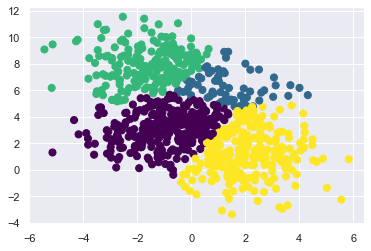

In [241]:
means = k_means(4, 0)
b =  30
print(f"количество объетов {len(X)}, размер батча {b}")
means.fit(X, b, 400, 1)

количество объетов 800, размер батча 30


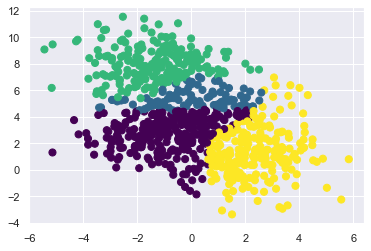

In [242]:
means = k_means(4, 1)
b =  30
print(f"количество объетов {len(X)}, размер батча {b}")
means.fit(X, b, 400, 1)

количество объетов 800, размер батча 35


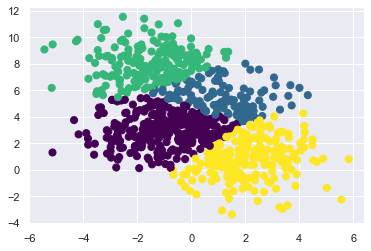

In [246]:
means = k_means(4, 0)
b = 35
print(f"количество объетов {len(X)}, размер батча {b}")
means.fit(X, b, 400, 1)